# Figure 5 finalisation

In [1]:
setwd("/home/data/project_code/landstrom_core/prognostic_model_development/r/notebooks")
library(ggplot2)
library(tidyverse)
source("../getTCGAData.R")
source("../preprocessTCGAData.R")
source("../KM_analysis.R")
source("../Heatmaps.R")
source("../enet.R")
library(ggpubr)
library(rstatix)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int

## Read in data 

Feature vs tumor stage boxplots 

In [2]:
input.path = "/workstation/project_results/landstrom_core/Features_vs_tumor_stage/Features_and_tumor_stage_boxplots/"

In [3]:
blca.data = readRDS(file.path(input.path, "BLCA_data_for_plot_.rds"))
stad.data = readRDS(file.path(input.path, "STAD_data_for_plot_.rds"))
read.data = readRDS(file.path(input.path, "READ_data_for_plot_.rds"))
kirp.data = readRDS(file.path(input.path, "KIRP_data_for_plot_.rds"))
luad.data = readRDS(file.path(input.path, "LUAD_data_for_plot_.rds"))
kirc.data = readRDS(file.path(input.path, "KIRC_data_for_plot_.rds"))

# UPDATE
kich.data = readRDS(file.path(input.path, "KICH_data_for_plot_.rds"))
paad.data = readRDS(file.path(input.path, "PAAD_data_for_plot_.rds"))
tgct.data = readRDS(file.path(input.path, "TGCT_data_for_plot_.rds"))
chol.data = readRDS(file.path(input.path, "CHOL_data_for_plot_.rds"))

Feature frequency barplot

In [4]:
input.path = "/home/data/project_code/landstrom_core/prognostic_model_development/r/notebooks/prognostic_model_development/"

In [5]:
barplot.data = readRDS(file.path(input.path, "barplot_input.rds"))

## Prepare the plots 

Prepare barplot

In [6]:
# Barplot based on freq for sig models 
gg.barplot = barplot.data  %>%  
            ggplot(aes(x = reorder(Feature, Freq), y = Freq,  fill = Type)) + 
            geom_bar(stat="identity", colour = "black") + coord_flip() + theme_classic() +
            scale_y_continuous(limits = c(0, 25), breaks = seq(from = 0, to = 25, by = 5) , expand = c(0, 0)) + 
            labs(y = "Frequency", x = "Feature") + theme(axis.title.y = element_blank(),
                                                         axis.text = element_text(size = 14),
                                                         axis.text.x = element_text(colour = "black"), 
                                                         axis.text.y = element_text(colour = "black"),
                                                         legend.position = "bottom")

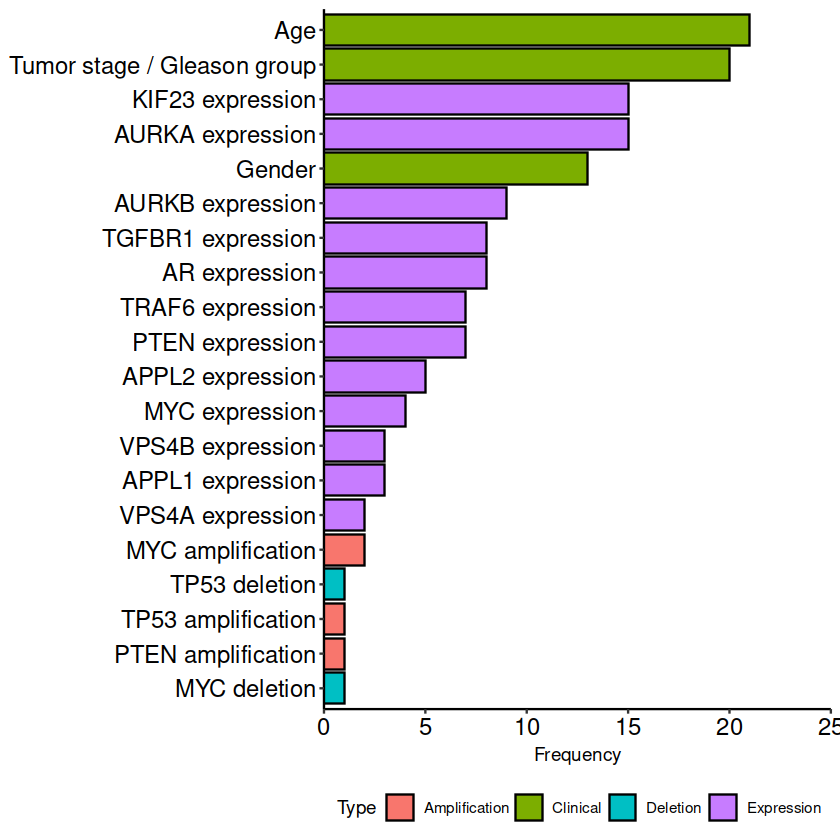

In [7]:
gg.barplot

## Preparing plot assoiciating KIF23, AURKA and AURKB to tumour stage

Read in correlation data

In [8]:
input.path.correlation = "/workstation/project_results/landstrom_core/Features_vs_tumor_stage/Features_and_tumor_stage_boxplots//lm//Correlation_results.csv"
correlation.results = read.csv(input.path.correlation)

In [9]:
correlation.results.selected.1 = correlation.results %>% filter(Cancer.type %in% c("KIRC", "LUAD", "KIRP", "KICH"))
correlation.results.selected.3genes = correlation.results.selected.1 %>% filter(Gene %in% c("KIF23.exp","AURKA.exp","AURKB.exp"))

In [10]:
correlation.results.selected.3genes$Feature = str_replace(correlation.results.selected.3genes$Gene, ".exp", "")

In [11]:
kirp.correlation = correlation.results.selected.3genes %>% filter(Cancer.type == "KIRP")
kirc.correlation = correlation.results.selected.3genes %>% filter(Cancer.type == "KIRC")
luad.correlation = correlation.results.selected.3genes %>% filter(Cancer.type == "LUAD")
kich.correlation = correlation.results.selected.3genes %>% filter(Cancer.type == "KICH")

In [12]:
kirp.correlation$lab = paste0("r = ", round(kirp.correlation$Corr, 2), "\n", 
                               "p = ", format(kirp.correlation$P.value, digit = 4))
kirc.correlation$lab = paste0("r = ", round(kirc.correlation$Corr, 2), "\n", 
                               "p = ", format(kirc.correlation$P.value, digit = 4))
kich.correlation$lab = paste0("r = ", round(kich.correlation$Corr, 2), "\n", 
                               "p = ", format(kich.correlation$P.value, digit = 4))
luad.correlation$lab = paste0("r = ", round(luad.correlation$Corr, 2), "\n", 
                               "p = ", format(luad.correlation$P.value, digit = 4))

In [13]:
kirp.exp.data.selected = kirp.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kirc.exp.data.selected = kirc.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kich.exp.data.selected = kich.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

luad.exp.data.selected = luad.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

In [14]:
kirp.plot = kirp.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = kirp.correlation, aes(x = Feature, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("KIRP") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 


kirc.plot = kirc.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = kirc.correlation, aes(x = Feature, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("KIRC") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 


kich.plot = kich.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = kich.correlation, aes(x = Feature, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("KICH") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

luad.plot = luad.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = luad.correlation, aes(x = Feature, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("LUAD") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”


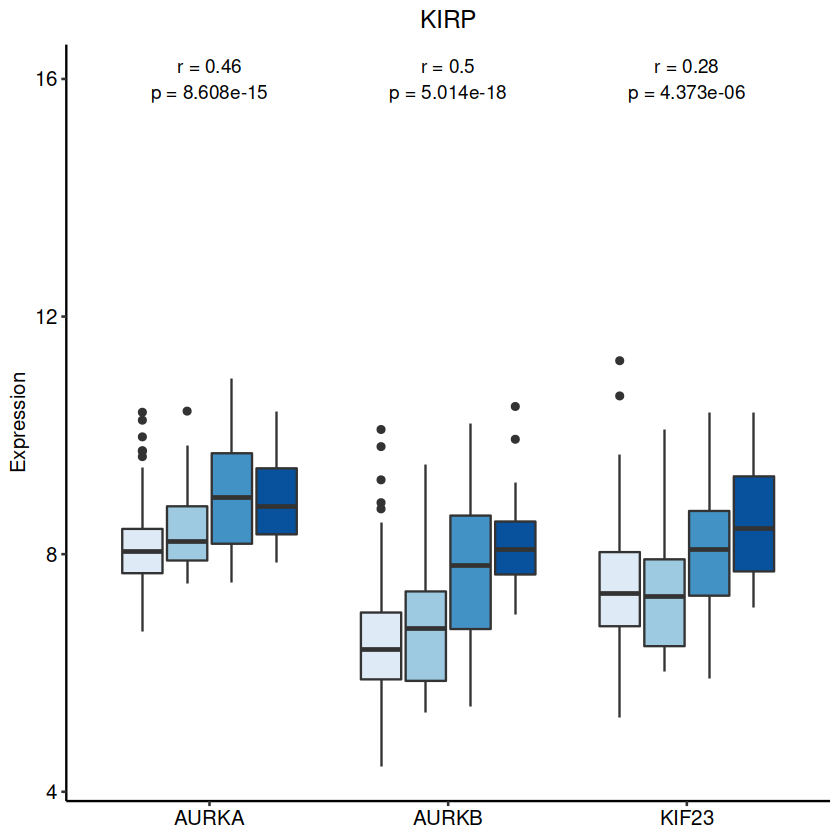

In [15]:
kirp.plot

Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”


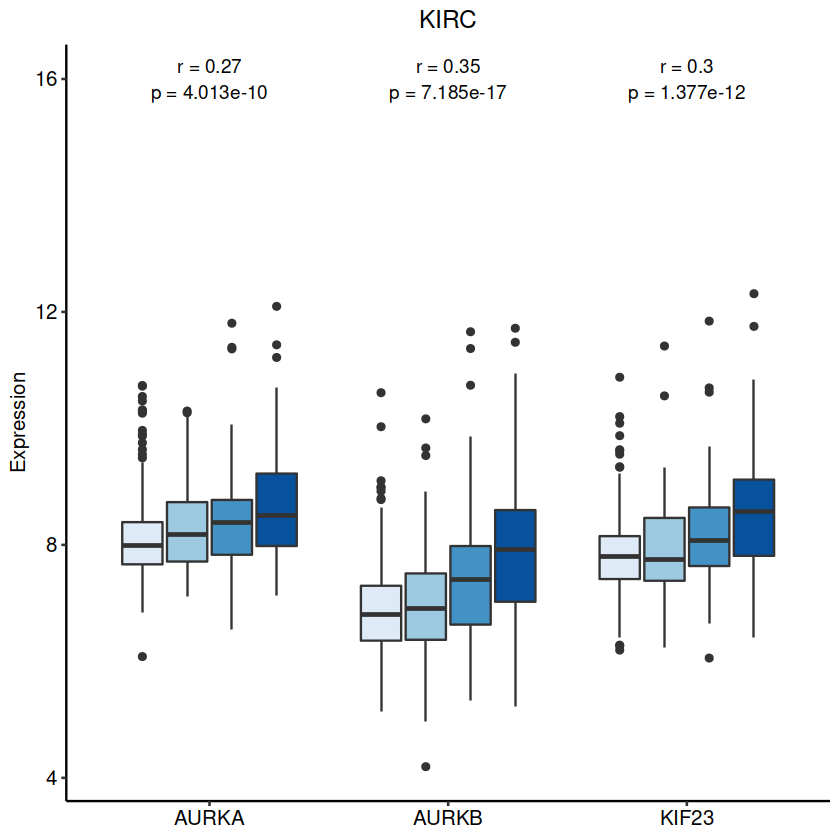

In [16]:
kirc.plot

Warning message:
“Removed 144 rows containing non-finite values (stat_boxplot).”


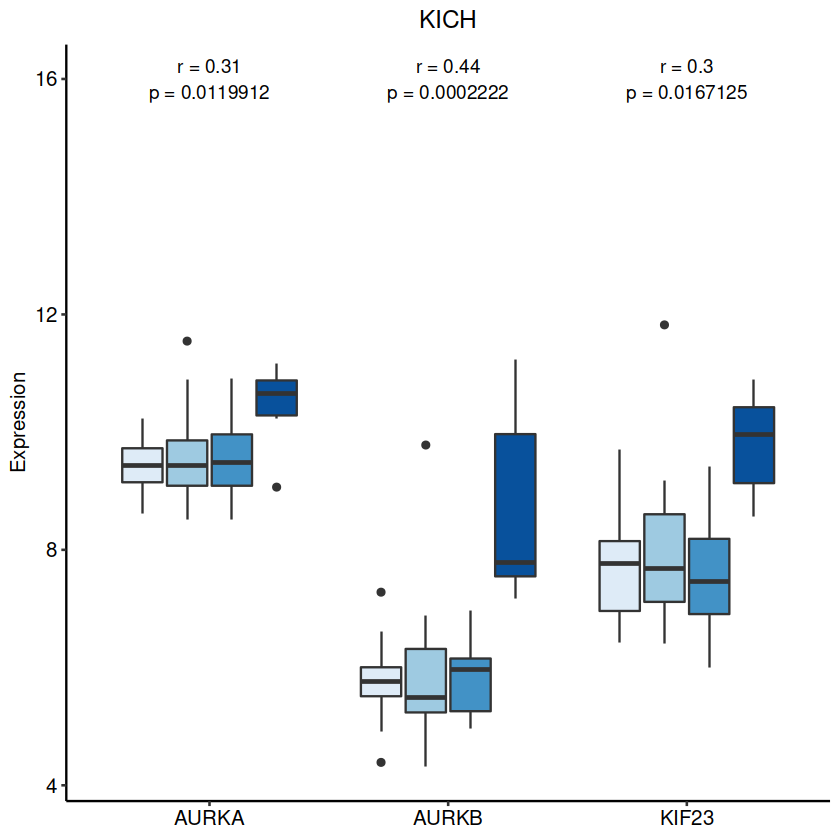

In [17]:
kich.plot

Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”


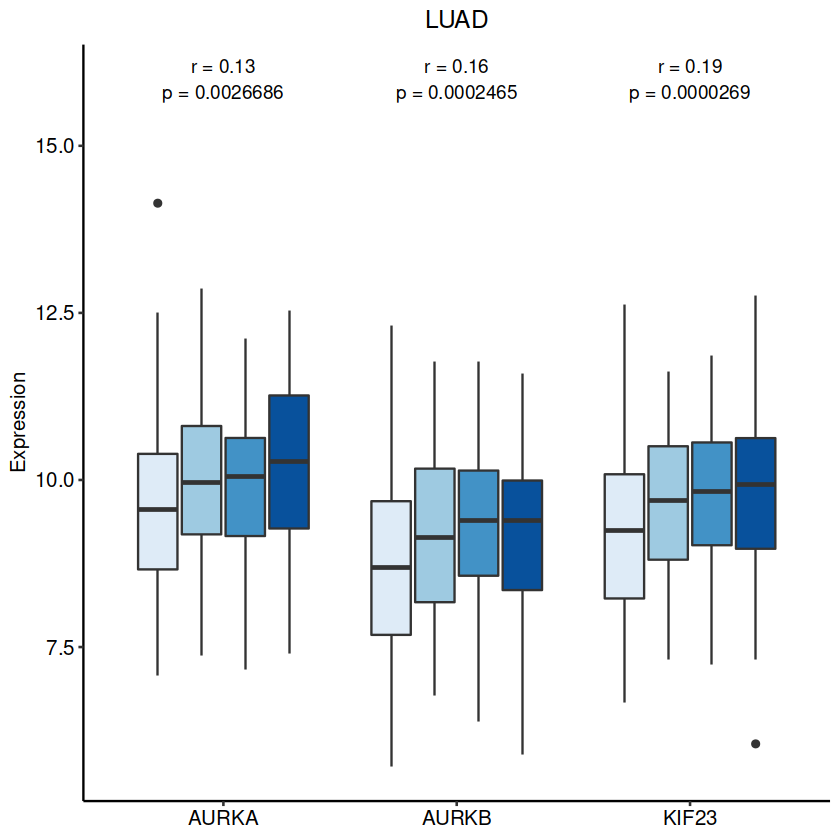

In [18]:
luad.plot

Prepare final figure

In [19]:
plots <- align_plots(kirp.plot, kirc.plot, kich.plot, luad.plot ,align = 'v', axis = 'l')
box.comb = plot_grid(plots[[1]], plots[[2]], plots[[3]], plots[[4]],  ncol = 2, labels = c("b","c","d","e"))

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 144 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”


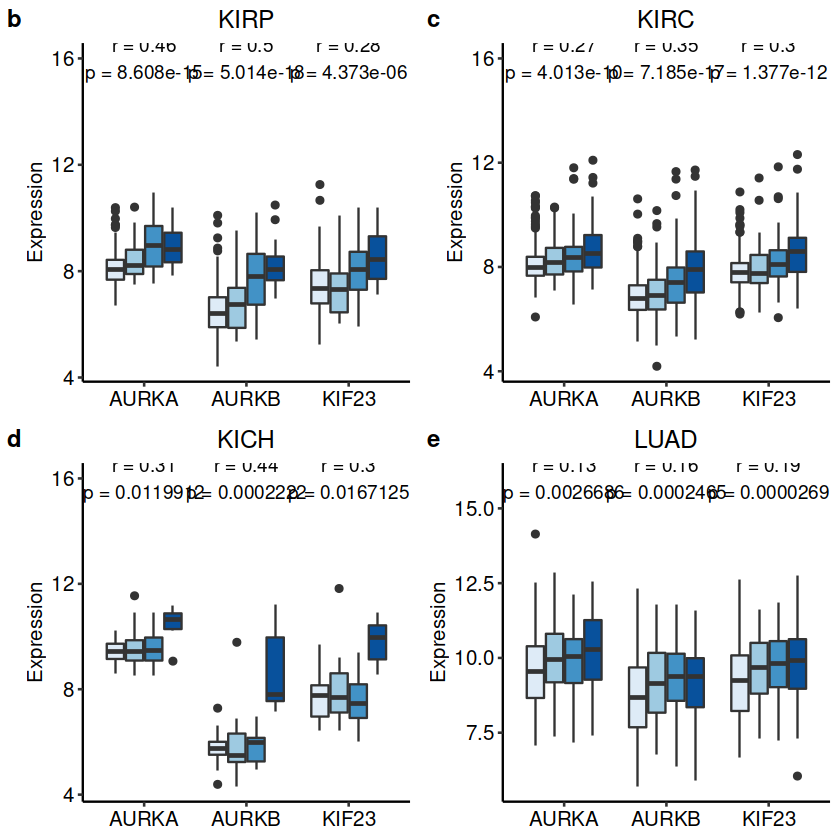

In [20]:
box.comb 

In [21]:
final.plot = plot_grid(gg.barplot, 
                       box.comb, 
                       ncol = 2, rel_widths = c(1, 1.5))

In [22]:
save_plot(plot = final.plot, 
          filename = "KIRP_KIRC_KICH_LUAD_vs_tumor_stage_boxplot.pdf", base_height = 10, base_width = 18)

In [23]:
getwd()

[1] "/home/data/project_code/landstrom_core/prognostic_model_development/r/notebooks"

## Preparing plot associating TGFBR1 and tumour stage 

Generate new object storing TGFBR1 expression data for BLCA, STAD, KIRP and READ

In [24]:
correlation.results.selected.2 = correlation.results %>% filter(Cancer.type %in% c("BLCA", "STAD", "KIRP", "READ"))
correlation.results.selected.TGFBR1 = correlation.results.selected.2 %>% filter(Gene == "TGFBR1.exp")

In [25]:
correlation.results.selected.TGFBR1$Feature = str_replace(correlation.results.selected.TGFBR1$Gene, ".exp", "")

In [26]:
correlation.results.selected.TGFBR1

X,Cancer.type,Gene,Corr,P.value,Feature
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
cor...13,BLCA,TGFBR1.exp,0.2195999,7.976976e-06,TGFBR1
cor...104,KIRP,TGFBR1.exp,0.2137933,5.318632e-04,TGFBR1
cor...195,READ,TGFBR1.exp,0.1719002,3.189182e-02,TGFBR1
cor...221,STAD,TGFBR1.exp,0.1474454,5.577361e-03,TGFBR1


In [27]:
correlation.results.selected.TGFBR1$lab = paste0("r = ", round(correlation.results.selected.TGFBR1$Corr, 2), "\n", 
                               "p = ", format(correlation.results.selected.TGFBR1$P.value, digit = 4))

In [28]:
correlation.results.selected.TGFBR1

X,Cancer.type,Gene,Corr,P.value,Feature,lab
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cor...13,BLCA,TGFBR1.exp,0.2195999,7.976976e-06,TGFBR1,r = 0.22 p = 7.977e-06
cor...104,KIRP,TGFBR1.exp,0.2137933,5.318632e-04,TGFBR1,r = 0.21 p = 5.319e-04
cor...195,READ,TGFBR1.exp,0.1719002,3.189182e-02,TGFBR1,r = 0.17 p = 3.189e-02
cor...221,STAD,TGFBR1.exp,0.1474454,5.577361e-03,TGFBR1,r = 0.15 p = 5.577e-03


In [29]:
tgfbr1.exp.datasets = list(blca.data$exp.data,stad.data$exp.data,
                           read.data$exp.data,kirp.data$exp.data)
names(tgfbr1.exp.datasets) = c("BLCA","STAD","READ","KIRP")

In [30]:
expression.data.tgfbr1 = bind_rows(tgfbr1.exp.datasets, .id = "Cancer.type") %>% filter(Feature == "TGFBR1")

In [31]:
tgfbr1.plot = expression.data.tgfbr1 %>% 
               ggplot(aes(x = Cancer.type)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = correlation.results.selected.TGFBR1, aes(x = Cancer.type, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("TGFBR1") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

Warning message:
“Removed 75 rows containing non-finite values (stat_boxplot).”


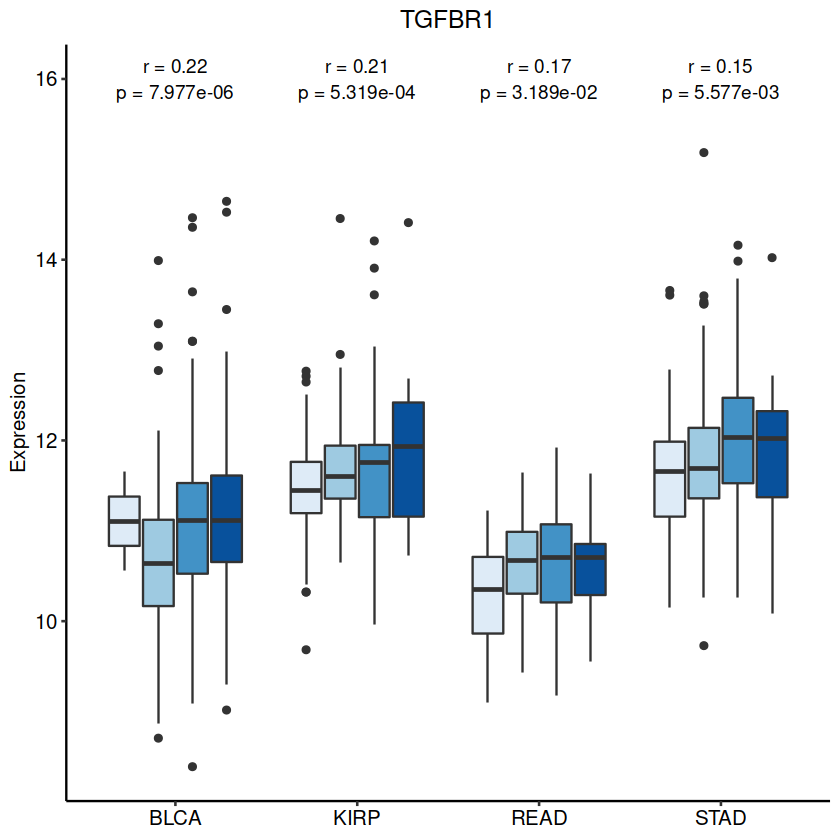

In [32]:
tgfbr1.plot

In [33]:
getwd()

[1] "/home/data/project_code/landstrom_core/prognostic_model_development/r/notebooks"

## Preparing plot associating MYC and tumour stage 

PAAD, KIRP, TGCT

In [34]:
correlation.results.selected.3 = correlation.results %>% filter(Cancer.type %in% c("PAAD","KIRP","TGCT"))
correlation.results.selected.MYC = correlation.results.selected.3 %>% filter(Gene == "MYC.exp")

In [35]:
correlation.results.selected.MYC$Feature = str_replace(correlation.results.selected.MYC$Gene, ".exp", "")

In [36]:
correlation.results.selected.MYC

X,Cancer.type,Gene,Corr,P.value,Feature
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
cor...103,KIRP,MYC.exp,0.3369112,2.709814e-08,MYC
cor...168,PAAD,MYC.exp,0.2157201,4.252852e-03,MYC
cor...233,TGCT,MYC.exp,0.1944531,2.847616e-02,MYC


In [37]:
correlation.results.selected.MYC$lab = paste0("r = ", round(correlation.results.selected.MYC$Corr, 2), "\n", 
                               "p = ", format(correlation.results.selected.MYC$P.value, digit = 4))

In [38]:
myc.exp.datasets = list(paad.data$exp.data, tgct.data$exp.data, kirp.data$exp.data)
names(myc.exp.datasets) = c("PAAD","TGCT", "KIRP")

In [39]:
expression.data.myc = bind_rows(myc.exp.datasets, .id = "Cancer.type") %>% filter(Feature == "MYC")

In [40]:
myc.plot = expression.data.myc %>% 
               ggplot(aes(x = Cancer.type)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = correlation.results.selected.MYC, aes(x = Cancer.type, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("MYC") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


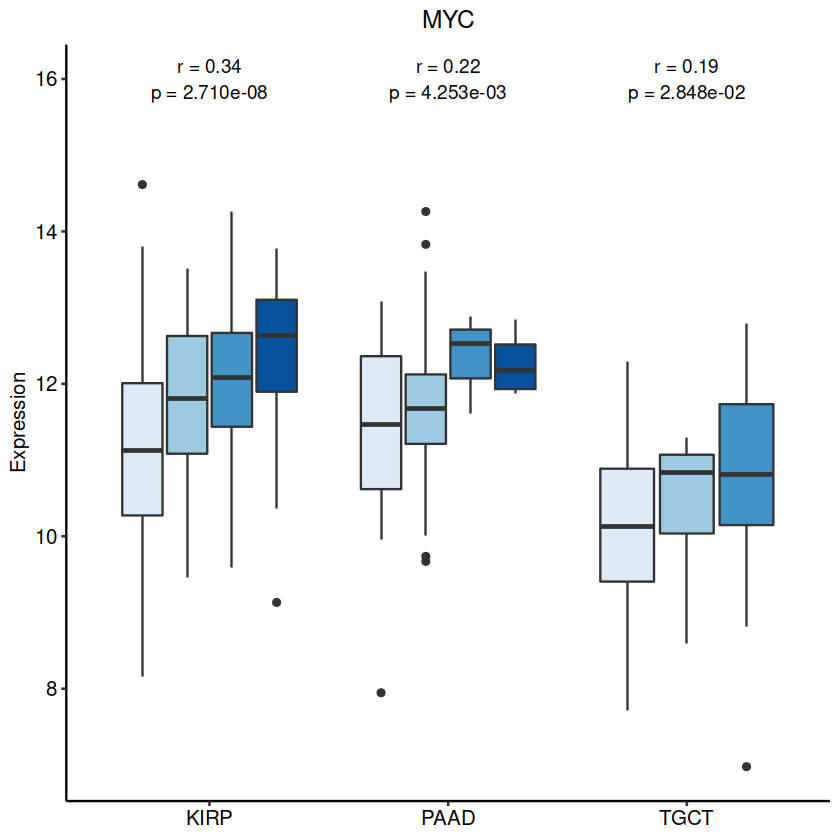

In [41]:
myc.plot

## Preparing plot associating TP53 and tumour stage 

CHOL, KIRP and TGCT

In [42]:
correlation.results.selected.4 = correlation.results %>% filter(Cancer.type %in% c("CHOL","KIRP","TGCT"))
correlation.results.selected.TP53 = correlation.results.selected.4 %>% filter(Gene == "TP53.exp")

In [43]:
correlation.results.selected.TP53$Feature = str_replace(correlation.results.selected.TP53$Gene, ".exp", "")

In [44]:
correlation.results.selected.TP53

X,Cancer.type,Gene,Corr,P.value,Feature
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
cor...37,CHOL,TP53.exp,0.4542074,0.0053908241,TP53
cor...102,KIRP,TP53.exp,0.2314597,0.0001711849,TP53
cor...232,TGCT,TP53.exp,0.1835150,0.0389008408,TP53


In [45]:
correlation.results.selected.TP53$lab = paste0("r = ", round(correlation.results.selected.TP53$Corr, 2), "\n", 
                               "p = ", format(correlation.results.selected.TP53$P.value, digit = 4))

In [46]:
tp53.exp.datasets = list(chol.data$exp.data, tgct.data$exp.data, kirp.data$exp.data)
names(tp53.exp.datasets) = c("CHOL","TGCT","KIRP")

In [47]:
expression.data.tp53 = bind_rows(tp53.exp.datasets, .id = "Cancer.type") %>% filter(Feature == "TP53")

In [48]:
tp53.plot = expression.data.tp53 %>% 
               ggplot(aes(x = Cancer.type)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = correlation.results.selected.TP53, aes(x = Cancer.type, label = lab, y = 16), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("TP53") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


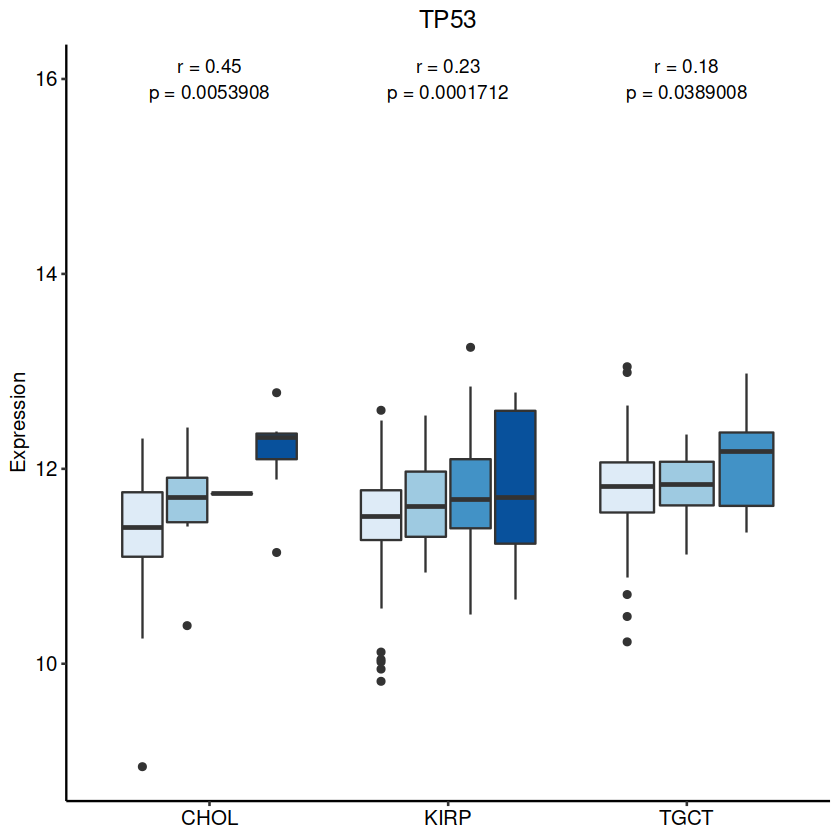

In [49]:
tp53.plot

In [50]:
plots <- align_plots(tgfbr1.plot, myc.plot, tp53.plot  ,align = 'v', axis = 'l')
box.comb = plot_grid(plots[[1]], plots[[2]], plots[[3]],  ncol = 1, labels = c("a", "b", "c"))

Warning message:
“Removed 75 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


In [51]:
save_plot(plot = box.comb, 
          filename = "Supplementary_boxplots.pdf", base_height = 14, base_width = 4.28)

## Old boxplots

Prepare the boxplots

In [52]:
# Keep only KIF23, AURKA and AURKB
brca.exp.data.selected = brca.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

brca.stat.selected = brca.data$stat %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kirp.exp.data.selected = kirp.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kirp.stat.selected = kirp.data$stat %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kirc.exp.data.selected = kirc.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

kirc.stat.selected = kirc.data$stat %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

luad.exp.data.selected = luad.data$exp.data %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

luad.stat.selected = luad.data$stat %>% 
                             dplyr::filter(Feature %in% c("KIF23","AURKA","AURKB"))

ERROR: Error in dplyr::filter(., Feature %in% c("KIF23", "AURKA", "AURKB")): object 'brca.data' not found


In [ ]:
gg.box.brca = brca.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = brca.stat.selected, aes(x = Feature, label = paste0("p = ", p), y = ymax), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("BRCA") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

gg.box.kirp = kirp.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = brca.stat.selected, aes(x = Feature, label = paste0("p = ", p), y = ymax), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("KIRP") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                            plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

gg.box.kirc = kirc.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = brca.stat.selected, aes(x = Feature, label = paste0("p = ", p), y = ymax), position = position_dodge(0.8)) + 
               theme_pubr() + ggtitle("KIRC") + theme(axis.title.x = element_blank(),
                             axis.text.x = element_text(colour = "black"), 
                             axis.text.y = element_text(colour = "black"),
                             legend.position = "None",
                             plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C"))

gg.box.luad = luad.exp.data.selected %>% 
               ggplot(aes(x = Feature)) + geom_boxplot(aes(y = Expression, fill = Tumor.stage.oth))+
               geom_text(data = brca.stat.selected, aes(x = Feature, label = paste0("p = ", p), y = ymax), position = position_dodge(0.8)) + 
               ggtitle("LUAD") +
               theme_pubr() + theme(axis.title.x = element_blank(),
                                    axis.text.x = element_text(colour = "black"), 
                                    axis.text.y = element_text(colour = "black"),
                                    legend.position = "None",
                                    plot.title = element_text(hjust = 0.5)) + 
               scale_fill_manual(values = c("#DEEBF7", "#9ECAE1", "#4292C6", "#08519C")) 

In [ ]:
plots <- align_plots(gg.box.kirp, gg.box.kirc, gg.box.luad, gg.box.brca, align = 'v', axis = 'l')
box.comb = plot_grid(plots[[1]], plots[[2]], plots[[3]], plots[[4]],  ncol = 2)

In [ ]:
final.plot = plot_grid(gg.barplot, 
                       box.comb, labels = c('a', 'b'), 
                       label_size = 24, ncol = 2, rel_widths = c(1, 1.5))

In [ ]:
final.plot

In [ ]:
save_plot(plot = final.plot, 
          filename = "final_figure5.pdf", base_height = 10, base_width = 18)